## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [ ]:
name='Aliya Gaffanova' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [ ]:
!pip install sktime
!pip install pmdarima

     |████████████████████████████████| 5.7MB 4.4MB/s 
     |████████████████████████████████| 22.2MB 1.9MB/s 
     |████████████████████████████████| 9.5MB 38.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 2.1MB 23.7MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [ ]:
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')
df.describe

<bound method NDFrame.describe of        sales  month  day  year
0    134.710     10   31  2020
1    137.740      7   31  2020
2    134.620      4   30  2020
3    141.670      1   31  2020
4    127.990     10   31  2019
..       ...    ...  ...   ...
142    1.656      4   30  1985
143    2.074      1   31  1985
144    1.584     10   31  1984
145    1.508      7   31  1984
146    1.235      4   30  1984

[147 rows x 4 columns]>

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [ ]:
# code here (0.5 pt.)
df.isna().value_counts() 

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [ ]:
# answer (0.5 pt.)
0

0

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [ ]:
# answer (0.5 pt.)
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [ ]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')
print(df)

       sales  month  day  year       date
0    134.710     10   31  2020 2020-10-31
1    137.740      7   31  2020 2020-07-31
2    134.620      4   30  2020 2020-04-30
3    141.670      1   31  2020 2020-01-31
4    127.990     10   31  2019 2019-10-31
..       ...    ...  ...   ...        ...
142    1.656      4   30  1985 1985-04-30
143    2.074      1   31  1985 1985-01-31
144    1.584     10   31  1984 1984-10-31
145    1.508      7   31  1984 1984-07-31
146    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


Change index to dates:

``` df.index=.... ```

In [ ]:
# code here (0.25 pt.)
df= df.set_index(df['date'])
print(df)

              sales  month  day  year       date
date                                            
2020-10-31  134.710     10   31  2020 2020-10-31
2020-07-31  137.740      7   31  2020 2020-07-31
2020-04-30  134.620      4   30  2020 2020-04-30
2020-01-31  141.670      1   31  2020 2020-01-31
2019-10-31  127.990     10   31  2019 2019-10-31
...             ...    ...  ...   ...        ...
1985-04-30    1.656      4   30  1985 1985-04-30
1985-01-31    2.074      1   31  1985 1985-01-31
1984-10-31    1.584     10   31  1984 1984-10-31
1984-07-31    1.508      7   31  1984 1984-07-31
1984-04-30    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


What is the size of the dataset?

use ```.shape```

In [ ]:
# code here (0.25 pt.)
print(df.shape)

(147, 5)


Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [ ]:
# code here (0.25 pt.)
df=df.drop(['day', 'year','month','date'], axis=1)
print(df)

              sales
date               
2020-10-31  134.710
2020-07-31  137.740
2020-04-30  134.620
2020-01-31  141.670
2019-10-31  127.990
...             ...
1985-04-30    1.656
1985-01-31    2.074
1984-10-31    1.584
1984-07-31    1.508
1984-04-30    1.235

[147 rows x 1 columns]


What is the size of the dataset now?

In [ ]:
# code here (0.25 pt.)
print(df.shape)

(147, 1)


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [ ]:
# code here (0.25 pt.)
y=df['sales']
print(y)

date
2020-10-31    134.710
2020-07-31    137.740
2020-04-30    134.620
2020-01-31    141.670
2019-10-31    127.990
               ...   
1985-04-30      1.656
1985-01-31      2.074
1984-10-31      1.584
1984-07-31      1.508
1984-04-30      1.235
Name: sales, Length: 147, dtype: float64


```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [ ]:
# code here (0.25 pt.)
y=np.flip(y)
print(y)

date
1984-04-30      1.235
1984-07-31      1.508
1984-10-31      1.584
1985-01-31      2.074
1985-04-30      1.656
               ...   
2019-10-31    127.990
2020-01-31    141.670
2020-04-30    134.620
2020-07-31    137.740
2020-10-31    134.710
Name: sales, Length: 147, dtype: float64


Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8ec4c6080>)

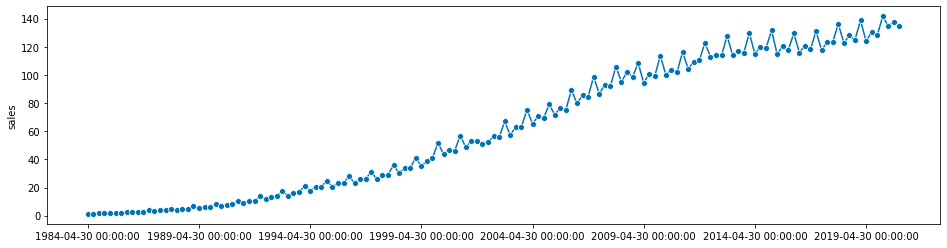

In [ ]:
# code here (0.25 pt.)
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [ ]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8ec3a4cf8>)

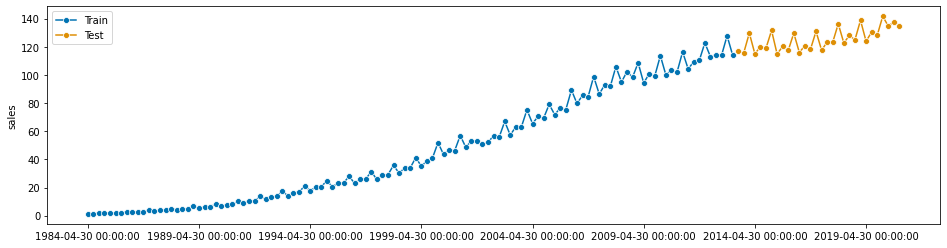

In [ ]:
# code here (0.25 pt.)
plot_series(y_train, y_test, labels=['Train', 'Test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [ ]:
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA = model_MAA.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [ ]:
# code here (0.5 pt.)
model_AAM=ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [ ]:
# code here (0.25 pt.)
MAA_forecast=fit_MAA.forecast(steps=30)

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [ ]:
# code here (0.25 pt.)
AAM_forecast=fit_AAM.forecast(steps=30)

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8e3d05780>)

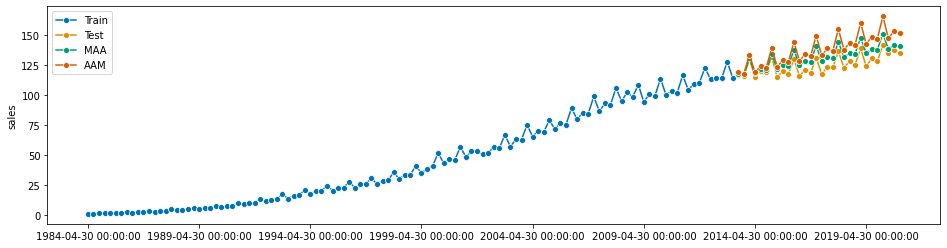

In [ ]:
# code here (0.5 pt.)
plot_series(y_train, y_test, MAA_forecast, AAM_forecast, labels=['Train', 'Test', 'MAA', 'AAM'])


### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [ ]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)


upper_int = pred_MAA["pi_upper"]
lower_int = pred_MAA["pi_lower"]
pred_MAA

,mean,mean_numerical,pi_lower,pi_upper
2013-07-31,117.848870,117.754340,107.654282,127.563150
2013-10-31,117.364671,117.262387,106.904724,128.088188
2014-01-31,130.725437,130.676262,117.003621,144.216157
2014-04-30,117.901781,117.707414,103.626601,132.366196
2014-07-31,121.230478,121.045032,100.553485,141.411863
2014-10-31,120.746279,120.728881,99.493204,145.883762
2015-01-31,134.107045,134.007864,108.325777,163.035388
2015-04-30,121.283388,121.121548,93.074700,152.398009
2015-07-31,124.612085,124.440403,91.979823,162.893457
2015-10-31,124.127886,124.401185,88.769440,167.991518


Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8e3da35f8>)

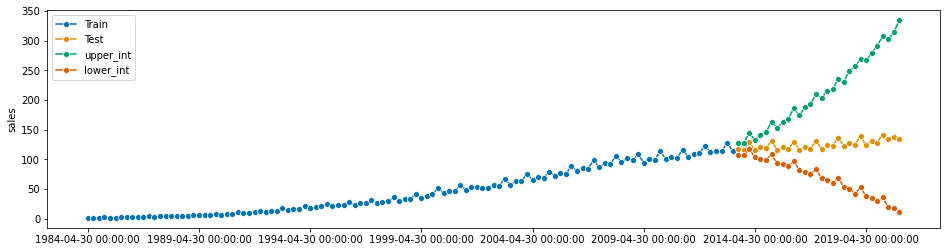

In [ ]:
# code here (0.5 pt.)
plot_series(y_train, y_test, upper_int, lower_int, labels=['Train', 'Test', 'upper_int', 'lower_int'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [ ]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)

upper_int = pred_AAM["pi_upper"]
lower_int = pred_AAM["pi_lower"]

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb8e3d3b5c0>)

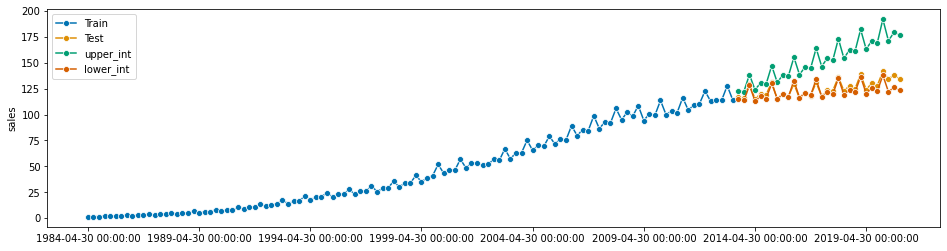

In [ ]:
# code here (0.5 pt.)
plot_series(y_train, y_test, upper_int, lower_int, labels=['Train', 'Test', 'upper_int', 'lower_int'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [ ]:
# code here (0.5 pt.) MAA
mean_absolute_error(y_test, MAA_forecast)


6.394546605755498

In [ ]:
# code here (0.5 pt.) AAM
mean_absolute_error(y_test, AAM_forecast)

12.709161383337841

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [ ]:
# code here (0.5 pt.) MAA
mean_squared_error(y_test, MAA_forecast)

50.57147037477893

In [ ]:
# code here (0.5 pt.) AAM
mean_squared_error(y_test, AAM_forecast)

195.9700976122845

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [ ]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Calculate MAPE:

In [ ]:
# code here (0.25 pt.) MAA
mean_absolute_percentage_error(y_test, MAA_forecast)

5.091701024681435

In [ ]:
# code here (0.25 pt.) AAM
mean_absolute_percentage_error(y_test, AAM_forecast)

9.993524328604307

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [ ]:
# code here (1 pt.)
print('MAA is better since it has lower MAE, MSE and MAPE')

MAA is better since it has lower MAE, MSE and MAPE
